In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("FeaturesAndLabels.csv",index_col=0)

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,...,163,164,165,166,167,168,169,170,171,label
nb_348235,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.900000,0.764706,0.235294,0.000000,0.000000,0.000000,0
nb_1063377,0.472727,0.0,0.0,0.000000,0.036364,0.0,0.0,0.0,0.0,0.0,...,0.041121,0.00000,0.014953,0.781308,0.291262,0.422330,0.208738,0.000000,0.077670,1
nb_133540,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.028571,0.917143,0.111111,0.629630,0.000000,0.000000,0.259259,0
nb_259182,0.000000,0.0,0.0,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,...,0.019802,0.00000,0.000000,0.871287,0.100000,0.700000,0.100000,0.000000,0.100000,2
nb_737658,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.043825,0.866534,0.461538,0.153846,0.000000,0.000000,0.384615,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nb_931295,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.218750,0.00000,0.000000,0.656250,0.071429,0.285714,0.642857,0.000000,0.000000,0
nb_630091,0.000000,0.0,0.0,0.333333,0.666667,0.0,0.0,0.0,0.0,0.0,...,0.044872,0.00000,0.025641,0.846154,0.113208,0.547170,0.264151,0.000000,0.075472,1
nb_1009537,0.000000,0.0,0.0,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,...,0.014354,0.00000,0.052632,0.861244,0.021277,0.595745,0.063830,0.000000,0.319149,2
nb_580343,0.000000,0.0,0.0,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,...,0.024390,0.04878,0.012195,0.780488,0.027778,0.555556,0.166667,0.111111,0.138889,2


In [4]:
featureMatrix = df.values[:,:-1]

In [5]:
from sklearn import manifold

In [6]:
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
X_tsne = tsne.fit_transform(featureMatrix)

In [7]:
import matplotlib.pyplot as plt

In [8]:
target = np.array(df["label"])

In [9]:
import seaborn as sns

In [10]:
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)
    cmap = sns.color_palette()
    plt.figure()
    ax = plt.subplot(111)
    sns.scatterplot(X[:, 0], X[:, 1], hue=target,palette=sns.color_palette("bright",n_colors=len(set(target))))
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

In [11]:
def plot_interactive_embedding(X, title=None):
    Xembed = pd.DataFrame(X,columns=["X","Y"])
    Xembed["nbName"] = df.index
    Xembed["cluster"] = list(df.label)

    import altair as alt
    chart = alt.Chart(Xembed).mark_point().encode(
        x = "X",
        y = "Y",
        color=alt.Color("cluster",type="nominal"),
        tooltip=['nbName']
    ).properties(
        title=title
    )
    chart.interactive()
    return chart

In [12]:
plot_interactive_embedding(X_tsne,"t-SNE embedding" )

alt.Chart(...)

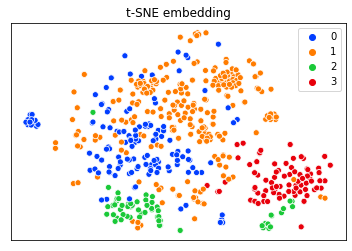

In [13]:
plot_embedding(X_tsne,"t-SNE embedding" )

In [14]:
import umap
reducer = umap.UMAP()

In [15]:
embedding = reducer.fit_transform(featureMatrix)

/Users/jerrysong/miniconda3/lib/python3.7/site-packages/numba/np/ufunc/parallel.py:355: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 11000. The TBB threading layer is disabled.
  warnings.warn(problem)


In [16]:
plot_interactive_embedding(embedding,"UMAP embedding" )

alt.Chart(...)

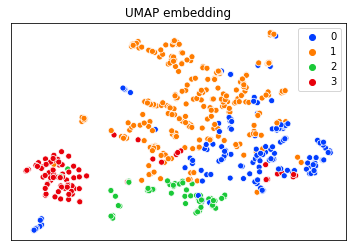

In [17]:
plot_embedding(embedding,"UMAP embedding" )

In [18]:
embedder = manifold.SpectralEmbedding(n_components=2, random_state=0,
                                      eigen_solver="arpack")
X_se = embedder.fit_transform(featureMatrix)
# plot_embedding(X_se,"Spectral embedding" )
plot_interactive_embedding(X_se,"Spectral embedding")

alt.Chart(...)

In [19]:
clf = manifold.MDS(n_components=2, n_init=1, max_iter=100)
X_mds = clf.fit_transform(featureMatrix)
# plot_embedding(X_mds,"MDS embedding")
plot_interactive_embedding(X_mds,"MDS embedding")

alt.Chart(...)